In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#  import stock data (csv)
adjOpen = pd.read_csv('stocks-us-adjOpen.csv')
adjClose = pd.read_csv('stocks-us-adjClose.csv')
volume = pd.read_csv('stocks-us-Volume.csv')
adjHigh = pd.read_csv('stocks-us-adjHigh.csv')
adjLow = pd.read_csv('stocks-us-adjLow.csv')

In [3]:
adjClose_melt = pd.melt(adjClose,id_vars=['compiled from Yahoo! Finance data by Matt Borthwick'],var_name='Ticker',value_name='Close')
adjOpen_melt = pd.melt(adjOpen,id_vars=['compiled from Yahoo! Finance data by Matt Borthwick'],var_name='Ticker',value_name='Open')
adjHigh_melt = pd.melt(adjClose,id_vars=['compiled from Yahoo! Finance data by Matt Borthwick'],var_name='Ticker',value_name='High')
adjLow_melt = pd.melt(adjOpen,id_vars=['compiled from Yahoo! Finance data by Matt Borthwick'],var_name='Ticker',value_name='Low')
volume_melt = pd.melt(adjClose,id_vars=['compiled from Yahoo! Finance data by Matt Borthwick'],var_name='Ticker',value_name='Volume')

In [4]:
volume_melt.head()

,compiled from Yahoo! Finance data by Matt Borthwick,Ticker,Volume
0,1970-01-02,ED,0.307997
1,1970-01-05,ED,0.320831
2,1970-01-06,ED,0.316553
3,1970-01-07,ED,0.312275
4,1970-01-08,ED,0.312275


In [5]:
# rename data and stock symbol column
adjClose_melt.columns = ['Date','Symbol','Close']
adjOpen_melt.columns = ['Date','Symbol','Open']
adjHigh_melt.columns = ['Date','Symbol','High']
adjLow_melt.columns = ['Date','Symbol','Low']
volume_melt.columns = ['Date','Symbol','Volume']

In [6]:
adjClose_melt.head()

,Date,Symbol,Close
0,1970-01-02,ED,0.307997
1,1970-01-05,ED,0.320831
2,1970-01-06,ED,0.316553
3,1970-01-07,ED,0.312275
4,1970-01-08,ED,0.312275


In [7]:
adjOpen_melt.head()

,Date,Symbol,Open
0,1970-01-02,ED,0.292312
1,1970-01-05,ED,0.310850
2,1970-01-06,ED,0.320831
3,1970-01-07,ED,0.315127
4,1970-01-08,ED,0.312275


In [8]:
merge_OpenClose = pd.merge(adjOpen_melt,adjClose_melt,how='outer',left_on=['Date','Symbol'],right_on=['Date','Symbol'])
merge_High = pd.merge(merge_OpenClose,adjHigh_melt,how='outer',left_on=['Date','Symbol'],right_on=['Date','Symbol'])
merge_Low = pd.merge(merge_High,adjLow_melt,how='outer',left_on=['Date','Symbol'],right_on=['Date','Symbol'])
Stock_Data = pd.merge(merge_Low,volume_melt,how='outer',left_on=['Date','Symbol'],right_on=['Date','Symbol'])

In [9]:
Stock_Data

,Date,Symbol,Open,Close,High,Low,Volume
0,1970-01-02,ED,0.292312,0.307997,0.307997,0.292312,0.307997
1,1970-01-05,ED,0.310850,0.320831,0.320831,0.310850,0.320831
2,1970-01-06,ED,0.320831,0.316553,0.316553,0.320831,0.316553
3,1970-01-07,ED,0.315127,0.312275,0.312275,0.315127,0.312275
4,1970-01-08,ED,0.312275,0.312275,0.312275,0.312275,0.312275
5,1970-01-09,ED,0.312275,0.315127,0.315127,0.312275,0.315127
6,1970-01-12,ED,0.315127,0.313701,0.313701,0.315127,0.313701
7,1970-01-13,ED,0.313701,0.306571,0.306571,0.313701,0.306571
8,1970-01-14,ED,0.306571,0.306571,0.306571,0.306571,0.306571
9,1970-01-15,ED,0.306572,0.299442,0.299442,0.306572,0.299442


In [10]:
Stock_Data.shape

(8542720, 7)

In [11]:
Stock_Data['Date'] = pd.to_datetime(Stock_Data['Date'])

In [12]:
Stock_Data['Date'][0].weekday_name

'Friday'

In [13]:
Stock_Data['Date'][0].month

1

In [14]:
Stock_Data['Date'][0].year

1970

In [15]:
Stock_Data['Date'][10].quarter

1

In [20]:
#  VERY SLOW
#Stock_Data['Day'] = Stock_Data.apply(lambda df: df['Date'].day,axis=1)

In [17]:
Stock_Data['Year'] = pd.DatetimeIndex(Stock_Data['Date']).year
Stock_Data['Day'] = pd.DatetimeIndex(Stock_Data['Date']).day
Stock_Data['Weekday'] = pd.DatetimeIndex(Stock_Data['Date']).weekday_name
Stock_Data['Month'] = pd.DatetimeIndex(Stock_Data['Date']).month
Stock_Data['Quarter'] = pd.DatetimeIndex(Stock_Data['Date']).quarter

In [18]:
Stock_Data

,Date,Symbol,Open,Close,High,Low,Volume,Year,Day,Weekday,Month,Quarter
0,1970-01-02,ED,0.292312,0.307997,0.307997,0.292312,0.307997,1970,2,Friday,1,1
1,1970-01-05,ED,0.310850,0.320831,0.320831,0.310850,0.320831,1970,5,Monday,1,1
2,1970-01-06,ED,0.320831,0.316553,0.316553,0.320831,0.316553,1970,6,Tuesday,1,1
3,1970-01-07,ED,0.315127,0.312275,0.312275,0.315127,0.312275,1970,7,Wednesday,1,1
4,1970-01-08,ED,0.312275,0.312275,0.312275,0.312275,0.312275,1970,8,Thursday,1,1
5,1970-01-09,ED,0.312275,0.315127,0.315127,0.312275,0.315127,1970,9,Friday,1,1
6,1970-01-12,ED,0.315127,0.313701,0.313701,0.315127,0.313701,1970,12,Monday,1,1
7,1970-01-13,ED,0.313701,0.306571,0.306571,0.313701,0.306571,1970,13,Tuesday,1,1
8,1970-01-14,ED,0.306571,0.306571,0.306571,0.306571,0.306571,1970,14,Wednesday,1,1
9,1970-01-15,ED,0.306572,0.299442,0.299442,0.306572,0.299442,1970,15,Thursday,1,1


In [21]:
Stock_Data['Symbol'].unique()

array(['ED', 'DD', 'CVX', 'FL', 'CAT', 'IP', 'SJW', 'F', 'LLY', 'AVP',
       'NFG', 'BF-A', 'MATX', 'BK', 'SNE', 'KR', 'BP', 'C', 'CL', 'APA',
       'DDS', 'TSN', 'OII', 'BIF', 'LAWS', 'GWW', 'JCP', 'VNO', 'LPX',
       'WABC', 'NWLI', 'GLT', 'LUB', 'NL', 'PGR', 'BF-B', 'ADI', 'GHC',
       'GFI', 'SJI', 'SHLM', 'BAC', 'CTS', 'MAT', 'AP', 'WGO', 'MYL',
       'TRC', 'GIS', 'TMO', 'VLGEA', 'DUK', 'JPM', 'AGYS', 'L', 'BDX', 'D',
       'TGNA', 'IR', 'CAL', 'MSEX', 'NJR', 'ANAT', 'KMT', 'SENEB', 'WMK',
       'AEM', 'KMB', 'CHD', 'DHR', 'AVA', 'FUL', 'BBT', 'FHN', 'INTC',
       'KSU', 'CTG', 'KYO', 'MUX', 'MOG-A', 'CSX', 'CECE', 'SEIC', 'PHIIK',
       'NVO', 'COP', 'IFF', 'SLB', 'HUM', 'OXY', 'VLO', 'HRS', 'SO', 'THC',
       'IHC', 'VBF', 'CVBF', 'RDC', 'FMBI', 'TRST', 'ASNA', 'LM', 'PAYX',
       'SLM', 'AXE', 'SGMS', 'CB', 'JCI', 'SWK', 'NVR', 'ROST', 'JKHY',
       'CBU', 'STKL', 'MSFT', 'HVT-A', 'CY', 'BDN', 'VIVO', 'FISV', 'UNM',
       'TWN', 'EQC', 'MMT', 'CMU', 'FUN', 'FBNC',

In [22]:
Stock_Data[Stock_Data['Symbol']=='INTC']

,Date,Symbol,Open,Close,High,Low,Volume,Year,Day,Weekday,Month,Quarter
890368,1970-01-02,INTC,NaN,NaN,NaN,NaN,NaN,1970,2,Friday,1,1
890369,1970-01-05,INTC,NaN,NaN,NaN,NaN,NaN,1970,5,Monday,1,1
890370,1970-01-06,INTC,NaN,NaN,NaN,NaN,NaN,1970,6,Tuesday,1,1
890371,1970-01-07,INTC,NaN,NaN,NaN,NaN,NaN,1970,7,Wednesday,1,1
890372,1970-01-08,INTC,NaN,NaN,NaN,NaN,NaN,1970,8,Thursday,1,1
890373,1970-01-09,INTC,NaN,NaN,NaN,NaN,NaN,1970,9,Friday,1,1
890374,1970-01-12,INTC,NaN,NaN,NaN,NaN,NaN,1970,12,Monday,1,1
890375,1970-01-13,INTC,NaN,NaN,NaN,NaN,NaN,1970,13,Tuesday,1,1
890376,1970-01-14,INTC,NaN,NaN,NaN,NaN,NaN,1970,14,Wednesday,1,1
890377,1970-01-15,INTC,NaN,NaN,NaN,NaN,NaN,1970,15,Thursday,1,1


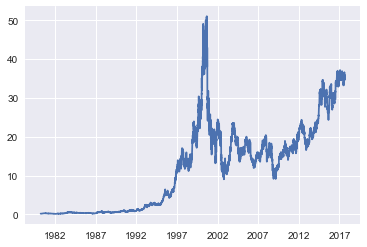

In [27]:
plt.plot(Stock_Data[Stock_Data['Symbol']=='INTC']['Date'],Stock_Data[Stock_Data['Symbol']=='INTC']['Close'])